ASSIGNMENT NUMBER 1
In this assignment, you will solve a problem, i.e., Chaky company makes some car but he has
difficulty setting the price for the car. Please make a simple web-based car price prediction system.
**********************************************************************************************

# 1. Loading the data set:
The data set is a CSV file, including 13 columns (attributes or variables) and 8128 rows (samples or records). Data is loaded using the pandas library. In this section, the number of rows, columns, and columns' names is checked after loading the data. This step is crucial because we can see whether a data set is loaded correctly or not. as we can see by the folowing codes, data set is loaded correctly but we need to do some data consideration.

In [1]:
import pandas as pd
df_cars=pd.read_csv('Cars.csv')

In [2]:
df_cars.shape

(8128, 13)

In [3]:
df_cars.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [4]:
df_cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


After inspecting the shape of the data set, some preparation like: encoding, reformating, and ... will be done including: 
1. Coding feature "owner": First Owner --> 1, Second Owner --> 2, Third owner --> 3, Fourth & Above Owner --> 4, Test Drive Car --> 5.
2. Removing rows with fuel values 'CNG' or 'LPG'.
3. Removing “kmpl” for the feature mileage, and convert the column to numerical type (e.g., float). 
4. Removing “CC” for the feature engine,  and convert the column to numerical type (e.g., float).
5. Removing “bph” for the feature Max_power,  and convert the column to numerical type (e.g., float),because there is a single value that is equal to 'bph',  to get a correct result the value is changed to ' bph'.
6. Taking only the first word and removing the rest For the feature brand.
7. Droping the feature torque.
8. Deleting all samples related to "Test Drive Cars == 5".
9. Transforming selling price by log transform function since selling price is a big number. y = np.log(df['selling_price']).


In [5]:
#1
owner_coding = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}
df_cars['owner'] = df_cars['owner'].map(owner_coding)
#2
df_cars = df_cars[df_cars['fuel'].isin(['Petrol', 'Diesel'])]
#3
df_cars.mileage = df_cars.mileage.str.split(expand=True)[0].astype(float)
#4
df_cars.engine = df_cars.engine.str.split(expand=True)[0].astype(float)
#5
df_cars.loc[df_cars['max_power'] == 'bph', 'max_power'] = ' bph'
df_cars.max_power = df_cars.max_power.str.split(expand=True)[0].astype(float)
#6
df_cars.name=df_cars.name.str.split(expand=True)[0]
#7
df_cars = df_cars.drop(columns=['torque'])
#8
df_cars = df_cars[df_cars['owner'] != 5]
#9
import numpy as np
df_cars['selling_price'] = np.log(df_cars['selling_price'])


Final check for loaded car data set structure:

In [6]:
df_cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [7]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 815.3+ KB


# 2. Exploratory Data Analysis

## summary statistics


In [8]:
desc_num = df_cars.describe(include=['float', 'int'])
desc_str = df_cars.describe(include=['object'])

In [9]:
desc_str

,name,fuel,seller_type,transmission
count,8028,8028,8028,8028
unique,32,2,3,2
top,Maruti,Diesel,Individual,Manual
freq,2378,4401,6673,6982


This dataset contains information on 8028 individual car listings. There are 32 different car names represented, with "Maruti" being the most common, appearing 2378 times. The dataset includes two main fuel types, with "Diesel" being the most popular, accounting for 4401 entries. The majority of listings (6673) come from individual sellers. The dataset also categorizes cars by their transmission type, with "Manual" being the most common at 698 instances. This dataset provides valuable insights into the distribution of car attributes, revealing which car models, fuel types, seller types, and transmission choices are most prevalent within the sample.

In [10]:
desc_num

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats
count,8028.000000,8028.000000,8.028000e+03,8028.000000,7814.000000,7814.000000,7820.000000,7814.000000
mean,2013.815521,12.979337,6.977314e+04,1.458022,19.391962,1462.914640,91.819726,5.421551
std,4.030836,0.838039,5.664419e+04,0.715283,4.001972,504.759742,35.804513,0.963125
min,1983.000000,10.308919,1.000000e+03,1.000000,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,12.468437,3.500000e+04,1.000000,16.780000,1197.000000,68.850000,5.000000
50%,2015.000000,13.017003,6.000000e+04,1.000000,19.300000,1248.000000,82.400000,5.000000
75%,2017.000000,13.429848,9.800000e+04,2.000000,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,16.118096,2.360457e+06,4.000000,42.000000,3604.000000,400.000000,14.000000


This dataset contains information about cars' numerous attributes, such as their year of manufacture, selling price, kilometers driven, number of previous owners, mileage, engine capacity, maximum power output, and seating capacity. The data includes 8028 entries. 
The log of the average selling price is around 12.98 units (specific unit not mentioned), and the average kilometers driven is approximately 69,773. The cars have had 1.46 previous owners, achieved a mileage of roughly 19.39 kmpl, and have an average engine capacity of approximately 1462.91 cc. The average number of seats in these cars is around 5.42, while the average maximum power output is approximately 91.82 bph.

Additionally, the data provides insights into the range and distribution of each attribute. For example, the manufacturing year ranges from 1983 to 2020, while the log of selling prices vary between around 10.31 and 16.12. The range of kilometers driven spans from 1000 to 2,360,457, while the number of previous owners ranges from 1 to 4. Mileage varies, with the lowest being 0 (which may indicate missing data) and the highest around 42 kmpl. Engine capacity ranges from 624 cc to 3604 cc, while the maximum power output ranges from 0 to 400 bph. The number of seats varies from 2 to 14. Among all features, km_driven and engine seem to have skewed distribution. We can explore more facts about the features and label by creating useful plots in the following section.

## count plot, distribution plot (histogarm), boxplot, and scatter plot of attributes

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib

A horizontal count plot (also known as a bar plot) is generated for each categorical feature to analyze their distribution and detect any anomalies. The information gathered from these plots is similar to that obtained from the summary statistics section for categorical variables. In addition, significant variations in category counts, such as individual vs. dealer and trust maker dealer, manual transmission vs. automatic, and first owner vs. other categories, can indicate that these columns may not be suitable as features due to the high frequency of one category.

<Axes: xlabel='count', ylabel='name'>

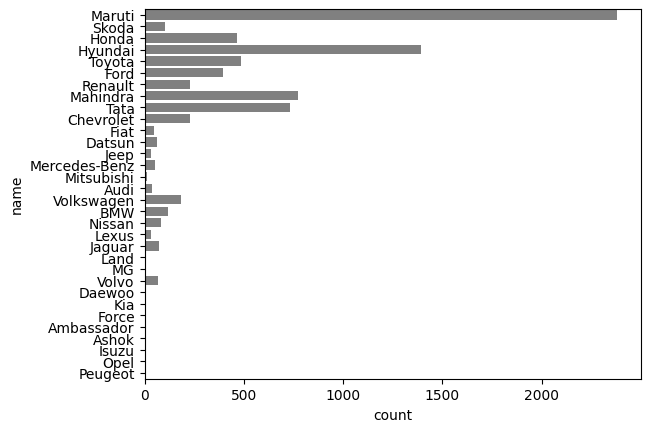

In [12]:
sns.countplot(data = df_cars, y = 'name', color = 'Grey')

<Axes: xlabel='count', ylabel='fuel'>

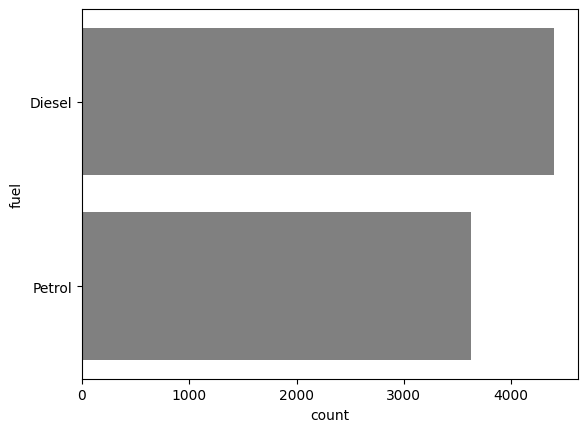

In [13]:
sns.countplot(data = df_cars, y = 'fuel', color = 'Grey')

<Axes: xlabel='count', ylabel='seller_type'>

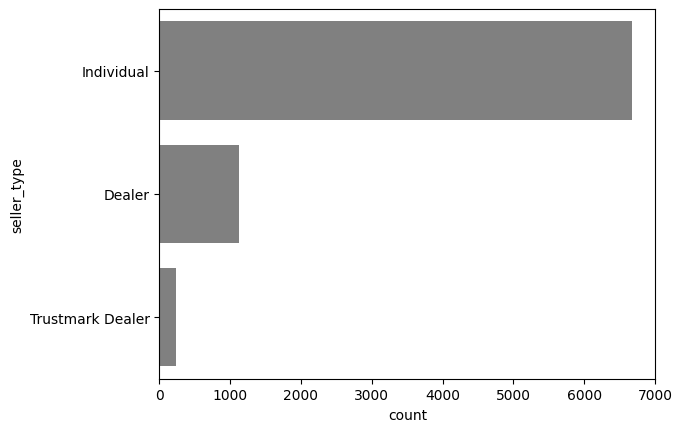

In [14]:
sns.countplot(data = df_cars, y = 'seller_type', color = 'Grey')

<Axes: xlabel='count', ylabel='transmission'>

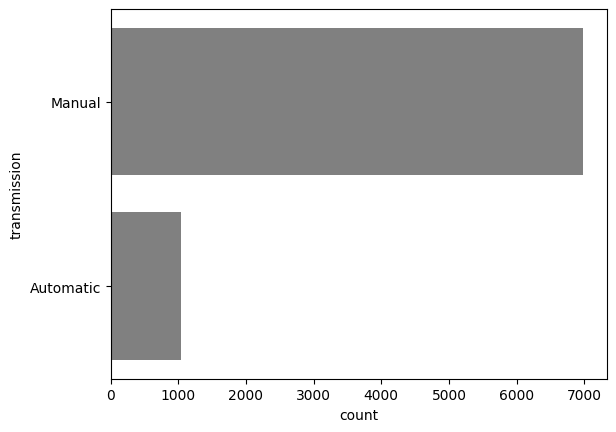

In [15]:
sns.countplot(data = df_cars, y = 'transmission', color = 'Grey')

<Axes: xlabel='count', ylabel='owner'>

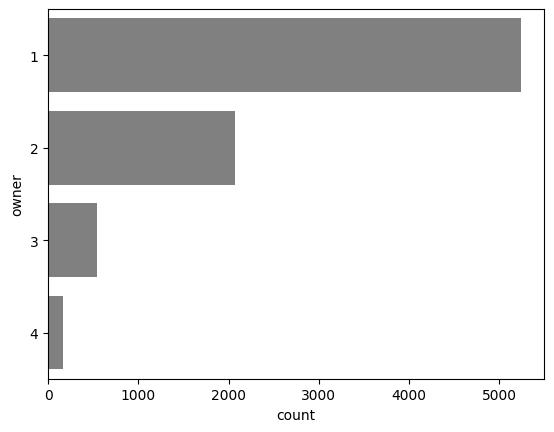

In [16]:
sns.countplot(data = df_cars, y = 'owner', color = 'Grey')

<Axes: xlabel='count', ylabel='seats'>

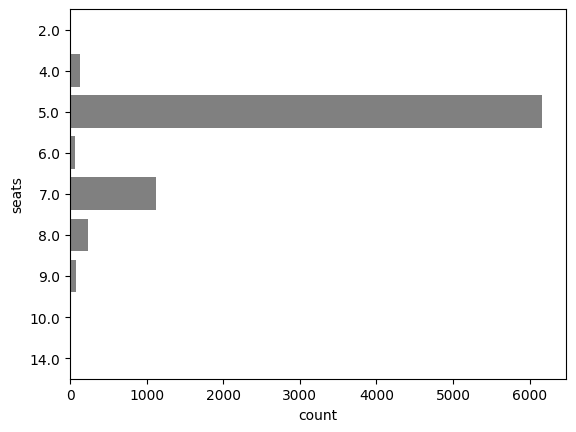

In [17]:
sns.countplot(data = df_cars, y = 'seats', color = 'grey')

The Distribution Plot (Histogram) is a useful tool to observe the distribution of continuous labels and features. It can also help identify deviations from a normal distribution, such as outliers, unusual observations, skewness, or kurtosis. Additionally, these plots can aid in finding the appropriate measure for imputing missing data. However, outlier detection and imputation should be done during the preprocessing phase. The histogram of the label (selling price) shows a relatively symmetric distribution, which is a desirable behavior. However, taking the logarithm of the original selling price may result in a bell-shaped distribution. On the other hand, the distribution of km_driven is highly skewed, making it unsuitable as a predictor unless some changes are made to this variable. The feature max_power also exhibits some skewness, as we suspected in the previous section. Furthermore, there is a gap in mileage, indicating some outliers in the distribution.

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


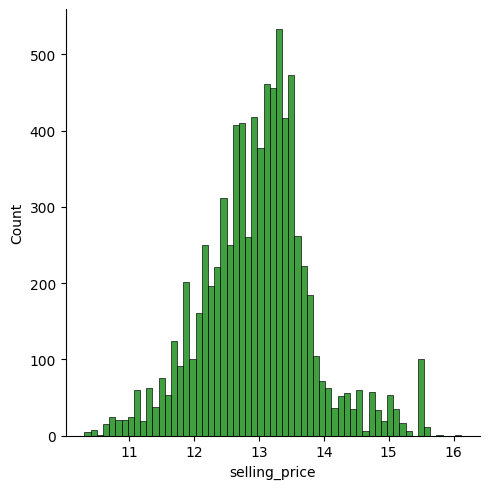

In [18]:
sns.displot(data = df_cars, x = 'selling_price', color = 'Green')

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


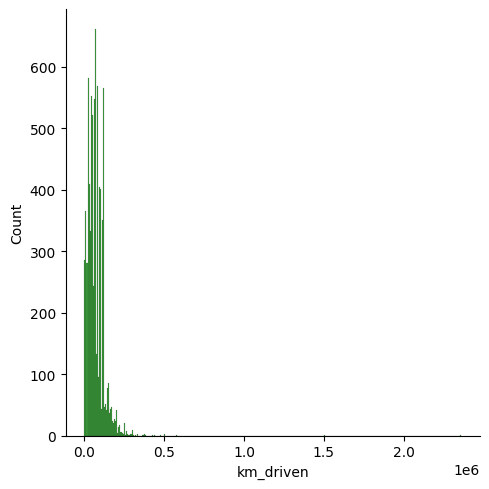

In [19]:
sns.displot(data = df_cars, x = 'km_driven', color = 'Green')

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


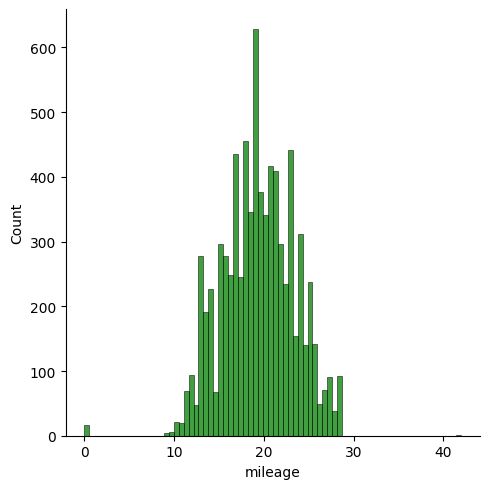

In [20]:
sns.displot(data = df_cars, x = 'mileage', color = 'Green')

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


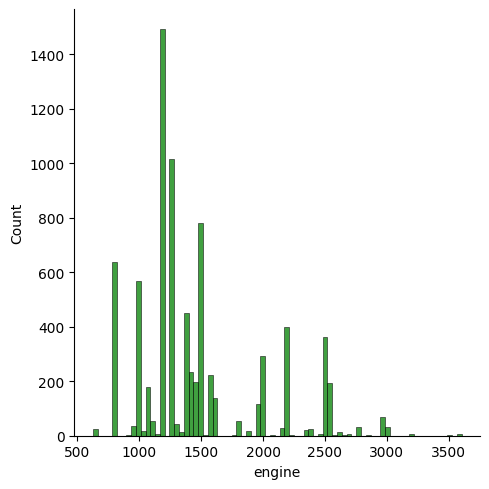

In [21]:
sns.displot(data = df_cars, x = 'engine', color = 'Green')

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


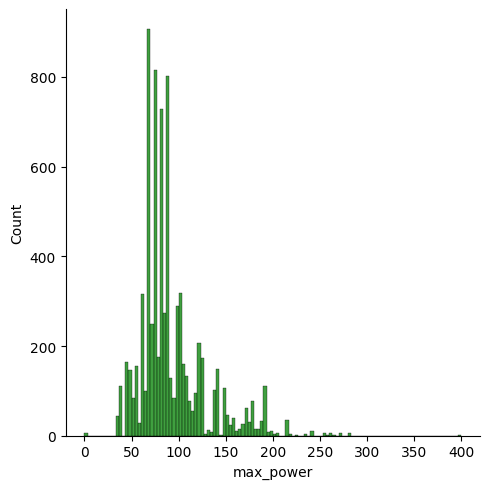

In [22]:
sns.displot(data = df_cars, x = 'max_power', color = 'Green')

The box plot is a helpful tool for exploring attribute distribution and identifying outliers. By creating this plot for continuous attributes based on the values of categorical features, we can compare distributions in subcategory samples. In this regression analysis, box plots of the label by categorical features are created. We can see in the box plot of the selling price that there are some extreme values, but the distribution is almost symmetrical. In other box plots, we can see significant differences in selling price distribution for various categories. However, as mentioned before, those categories have few samples in the data set, so we cannot rely on the results. For example, the distribution shape of selling prices for automatic cars or dealer sellers is very different. Moreover, the distribution of selling price in the two categories of fuel type is almost the same, indicating that fuel type may not be related to selling price when considered alone.

Text(0, 0.5, 'Selling Price')

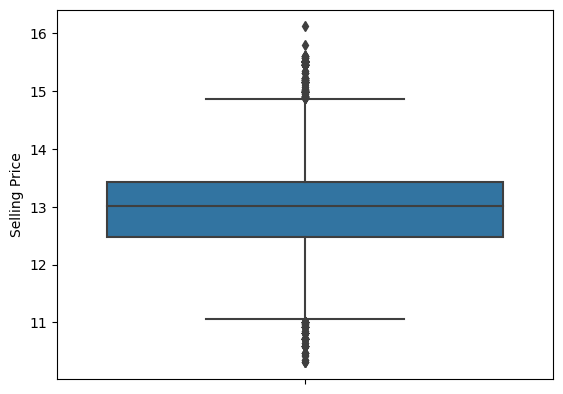

In [23]:
sns.boxplot(y = df_cars["selling_price"]);
plt.ylabel("Selling Price")


Text(0.5, 0, 'Fuel Type')

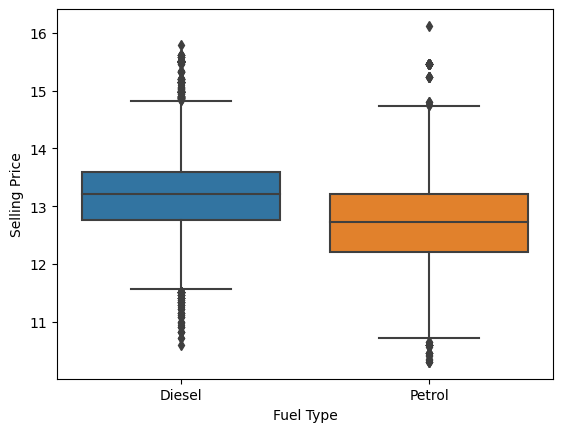

In [24]:
sns.boxplot( y = df_cars["selling_price"], x = df_cars["fuel"]);
plt.ylabel("Selling Price")
plt.xlabel("Fuel Type")

Text(0.5, 0, 'Seller Type')

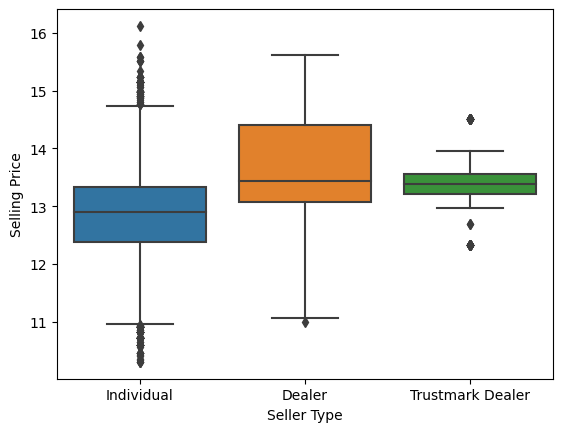

In [25]:
sns.boxplot( y = df_cars["selling_price"], x = df_cars["seller_type"]);
plt.ylabel("Selling Price")
plt.xlabel("Seller Type")

Text(0.5, 0, 'Transmission Type')

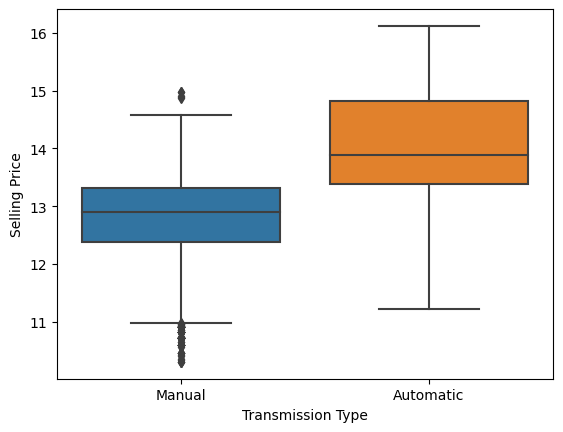

In [26]:
sns.boxplot( y = df_cars["selling_price"], x = df_cars["transmission"]);
plt.ylabel("Selling Price")
plt.xlabel("Transmission Type")

Text(0.5, 0, 'First Owner:1, Second Owner:2, Third Owner:3, Fourth & Above Owner:4')

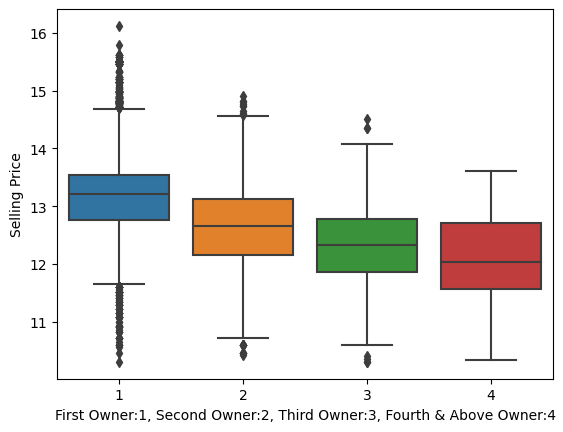

In [27]:
sns.boxplot( y = df_cars["selling_price"], x = df_cars["owner"]);
plt.ylabel("Selling Price")
plt.xlabel("First Owner:1, Second Owner:2, Third Owner:3, Fourth & Above Owner:4")

We can create a matrix of scatter plots using the following code to explore the relationship between the label and continuous features visually. This plot can help us identify any correlation (not causation) that may exist, whether it be none, linear, or nonlinear, which can aid in feature selection. Upon analysis, we can observe that the features max_power and engine demonstrate a strong linear relationship with the selling price. However, it is essential to note that these plots only show the relationship between the label and one feature at a time, and the shape or amplitude of the relationship could be different in the presence of other features.

/usr/local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


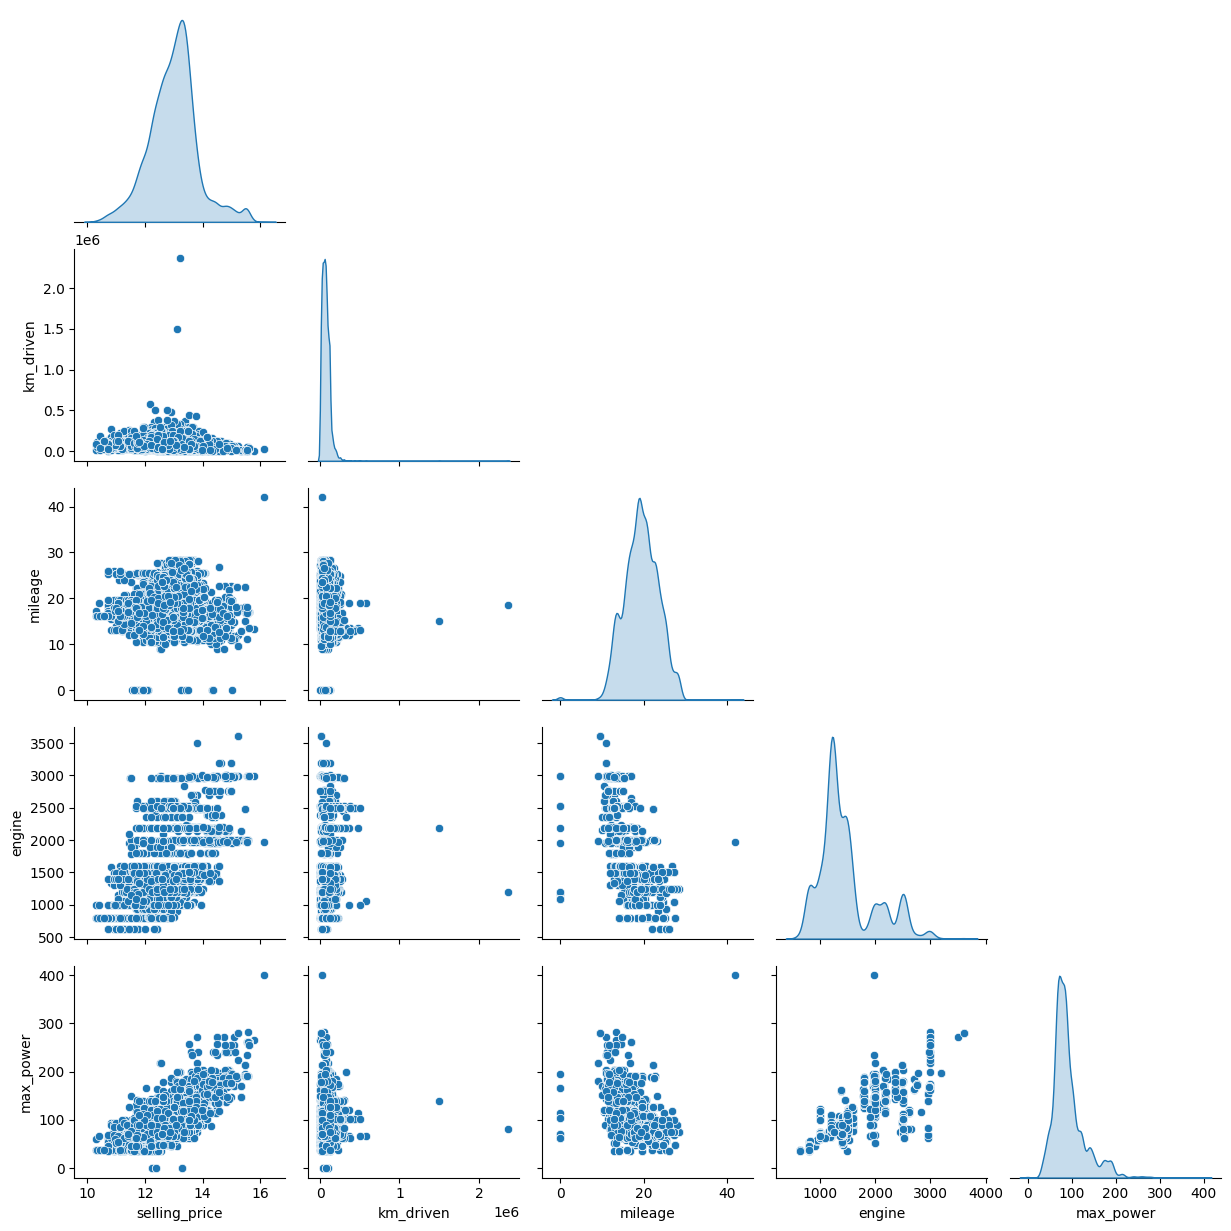

In [28]:
sns.pairplot(df_cars[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power']], diag_kind='kde', corner=True)

# 3. Feature engineering
 sometimes we can create new features by transforming / encoding existing variable. In this case we create four new columns:
1. As it is likely that the production year of cars is essential for predicting the car's price, a new feature car_age is created.
2. To consider correlation between features fuel, transmission, and seller_type, we encode them into 0 & 1 features (for seller type: one hot encoding).

In [29]:
from datetime import datetime
now = datetime.now()
df_cars['car_age'] = int(now.strftime("%Y")) - df_cars['year']

df_cars.loc[(df_cars['transmission'] == 'Manual','transmission_code')] = 0
df_cars.loc[(df_cars['transmission'] == 'Automatic', 'transmission_code')] = 1

df_cars.loc[(df_cars['fuel'] == 'Petrol','fuel_code')] = 0
df_cars.loc[(df_cars['fuel'] == 'Diesel', 'fuel_code')] = 1

df_cars.loc[(df_cars['seller_type'] == 'Individual', 'individual_seller')] = 1
df_cars.loc[(df_cars['seller_type'] == 'Dealer', 'individual_seller')] = 0
df_cars.loc[(df_cars['seller_type'] == 'Trustmark Dealer', 'individual_seller')] = 0
df_cars.loc[(df_cars['seller_type'] == 'Dealer', 'Dealer_seller')] = 1
df_cars.loc[(df_cars['seller_type'] == 'Individual', 'Dealer_seller')] = 0
df_cars.loc[(df_cars['seller_type'] == 'Trustmark Dealer', 'Dealer_seller')] = 0


# 4. Feature selection
When it comes to selecting important features for accurately predicting the selling price of a car, there are a few key tools and techniques that can be used. One such tool is the correlation matrix, which helps identify the strongest predictors of selling price based on the relationships between different variables. Scatter plots can also be used to gain additional insights and identify any potential issues with overly correlated features.

Another useful measure to consider is the Predictive Power Score (PPS), which can detect both linear and non-linear relationships between two columns of a dataset. This score ranges from 0 (no predictive power) to 1 (highest predictive power) and can be used to further refine the list of potential predictors for selling price.

After conducting a comprehensive analysis of the data, including calculations of Pearson and Spearman correlations we were able to identify several features that were strong predictors of selling price. These included max_power, mileage, engine, car_age, and transmission_code. However, because engine and max_power were highly correlated (with a correlation coefficient of 0.7), we ultimately decided to omit engine from the model.

When looking at the PPS table, we found that max_power, engine, mileage, and car_age were all likely to be good predictors of selling price. However, after considering all relevant factors, we ultimately chose to focus on max_power, mileage, and car_age as the regressors for predicting selling price. 

<Axes: >

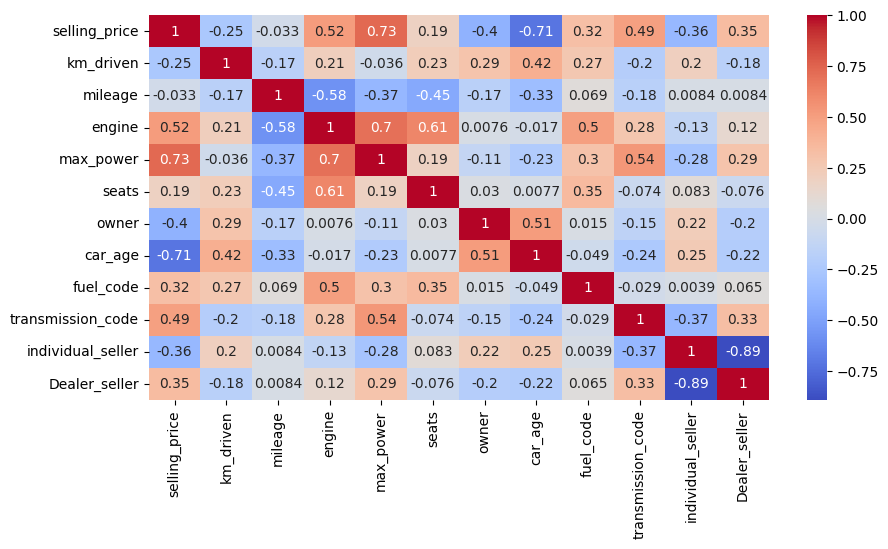

In [30]:
plt.figure(figsize = (10,5))
sns.heatmap(df_cars[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'owner',\
    'car_age', 'fuel_code', 'transmission_code', 'individual_seller', 'Dealer_seller' ]].corr(), annot=True, cmap="coolwarm")

<Axes: >

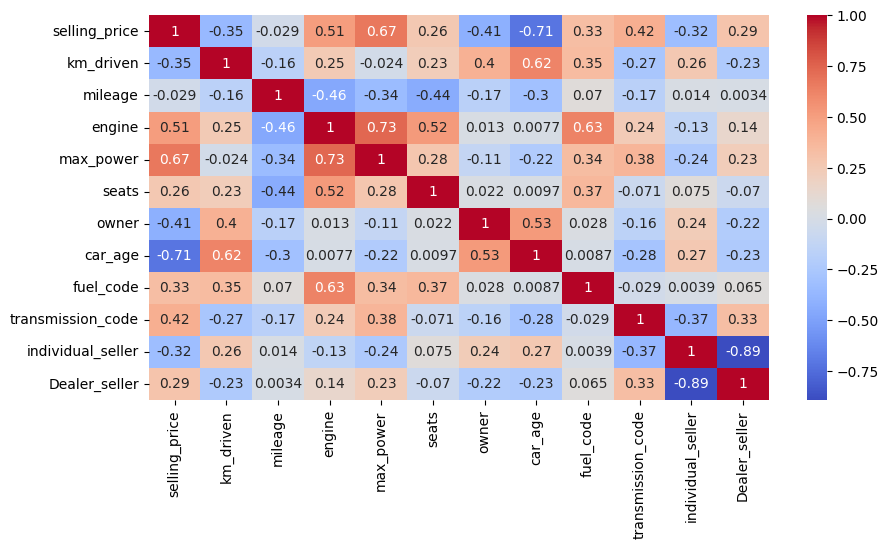

In [31]:
plt.figure(figsize = (10,5))
sns.heatmap(df_cars[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'owner',\
    'car_age', 'fuel_code', 'transmission_code', 'individual_seller', 'Dealer_seller' ]].corr(method='spearman'), annot=True, cmap="coolwarm")

In [32]:
# To choose proper features in pps matrix, before using it, features that have nominal scale are deleted
import ppscore as pps
df_cars_copy = df_cars.copy()
df_cars_copy.drop(['name', 'year', 'fuel', 'seller_type', 'transmission'], axis='columns', inplace=True)


<Axes: xlabel='x', ylabel='y'>

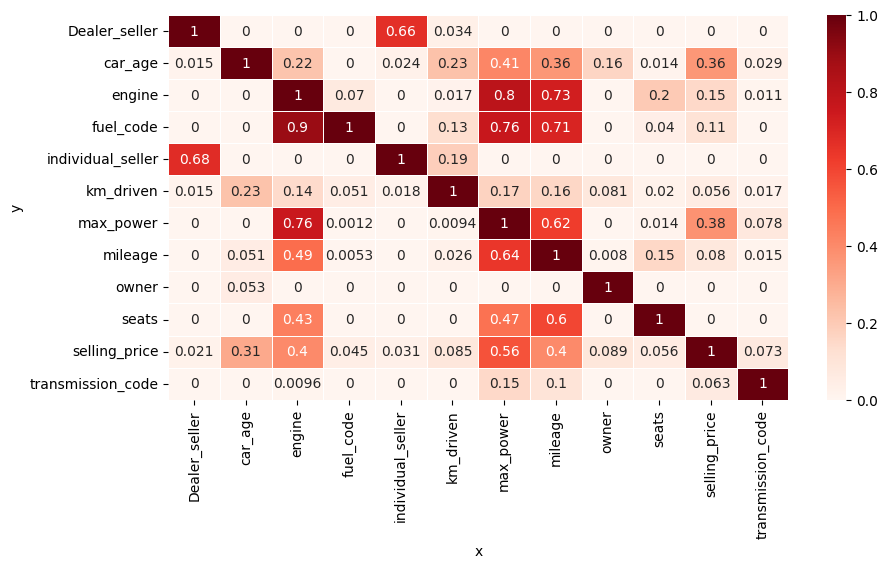

In [33]:
matrix_df_cars = pps.matrix(df_cars_copy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize = (10,5))
sns.heatmap(matrix_df_cars, vmin=0, vmax=1, cmap="Reds", linewidths=0.5, annot=True)

## Train and Test set creating

In [34]:

X = df_cars[['max_power', 'mileage', 'car_age']]
y = df_cars['selling_price']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 370)

In [36]:
y_train.shape, X_train.shape, y_test.shape, X_test.shape

((5619,), (5619, 3), (2409,), (2409, 3))

# 5. Preprocessing

### Null Values
There are some missing values in the max_power and mileage features. We need to decide how to fill (impute) these values. As the mileage distribution is slightly symmetrical and the mean and median are close, a simple solution is to impute the missing mileage values with the mean of the other values. However, for max_power, there is a significant difference between the mean and median (as confirmed by the box plot). Therefore, we will fill the missing power values with the median.
### Scaling
Based on the current data set, there does not appear to be any features with a significantly large value that would require scaling. Therefore, it can be concluded that scaling is unnecessary at this time.

In [37]:
X_train.isna().sum()

max_power    153
mileage      158
car_age        0
dtype: int64

In [38]:
X_test.isna().sum()

max_power    55
mileage      56
car_age       0
dtype: int64

In [39]:
y_train.isna().sum()

0

In [40]:
y_test.isna().sum()

0

<Axes: xlabel='max_power'>

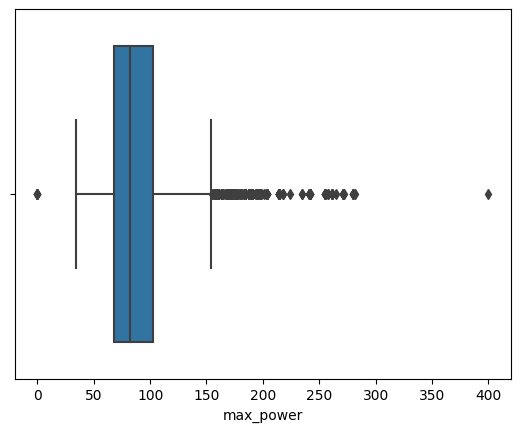

In [41]:
sns.boxplot(x = X_train['max_power'])

<Axes: xlabel='mileage'>

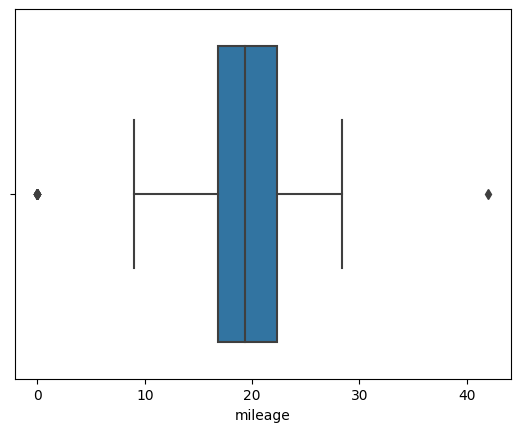

In [42]:
sns.boxplot(x = X_train['mileage'])

In [43]:
X_train[['max_power', 'mileage']].describe()

,max_power,mileage
count,5466.000000,5461.000000
mean,91.819147,19.394267
std,36.050036,4.018946
min,0.000000,0.000000
25%,68.050000,16.780000
50%,82.000000,19.300000
75%,102.375000,22.320000
max,400.000000,42.000000


In [44]:
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [45]:
X_train.isna().sum()

max_power    0
mileage      0
car_age      0
dtype: int64

In [46]:
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [47]:
X_test.isna().sum()

max_power    0
mileage      0
car_age      0
dtype: int64

# 6.Model Selection
I evaluated several models for predicting car prices, including Linear Regression, Support Vector Regressor (SVR), KNeighbors Regressor, Decision-Tree Regressor, and Random-Forest Regressor. Based on the results, the Random-Forest Regressor had the lowest absolute MSE value of 0.05386466826124616, closely followed by the KNeighbors Regressor with an absolute MSE of 0.06319179453269982.

While both models showed promising results, the Random-Forest Regressor appears to be the more suitable choice for predicting car prices. However, it's important to consider other factors, such as the complexity of the model, computational resources required, interpretability, and potential for overfitting. I suspect that these models may be overfitting, given the small MSE values for all algorithms.

Ultimately, we chose the Random-Forest Regressor as the most suitable model. After running the model on the test set, we measured the importance of the features by three methods. In all three methods, the most important feature was car_age, followed by max_power, and then mileage.

To validate the model with real, unseen data, we used a sample dataset for a Mitsubishi ASX car.

In [48]:
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print('MSE: ', mean_squared_error(y_test, yhat))
print('R2: ', r2_score(y_test, yhat))

MSE:  0.11857766073996678
R2:  0.8302457448804119


In [49]:
from sklearn.linear_model import LinearRegression  
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

algorithm_names = ['Linear Regression', 'SVR', 'KNeighbors Regressor', 'Decision-Tree Regressor', 'Random-Forest Regressor']

In [50]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=10, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean Squared Error (Neg): {scores.mean()}")

Linear Regression - Score: [-0.11200844 -0.113343   -0.11485807 -0.12369042 -0.1140722  -0.1164324
 -0.10669368 -0.13395323 -0.1073663  -0.11851289]; Mean Squared Error (Neg): -0.11609306212933775


SVR - Score: [-0.1209589  -0.10700605 -0.11180175 -0.09078019 -0.10396826 -0.10094543
 -0.11082223 -0.11827363 -0.09562146 -0.10218002]; Mean Squared Error (Neg): -0.10623579130197196
KNeighbors Regressor - Score: [-0.06232597 -0.06786345 -0.05140797 -0.04885714 -0.0580073  -0.07452842
 -0.05526411 -0.07032048 -0.07014879 -0.07083362]; Mean Squared Error (Neg): -0.06295572347212292
Decision-Tree Regressor - Score: [-0.08432154 -0.0624294  -0.08457874 -0.06293795 -0.06272365 -0.0724372
 -0.07162093 -0.06887785 -0.04803408 -0.06135093]; Mean Squared Error (Neg): -0.06793122675302696
Random-Forest Regressor - Score: [-0.05826776 -0.05008595 -0.06627411 -0.0545518  -0.04481049 -0.06257394
 -0.04752105 -0.06014192 -0.05657601 -0.04856291]; Mean Squared Error (Neg): -0.05493659393461501


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

grid.fit(X_train, y_train);  

In [52]:
grid.best_params_
best_mse = grid.best_score_
best_mse  

-0.056942246900705894

# 7.Testing

In [53]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.05182563179526552

# 8. Analysis

Text(0.5, 0, 'Random Forest Feature Importance')

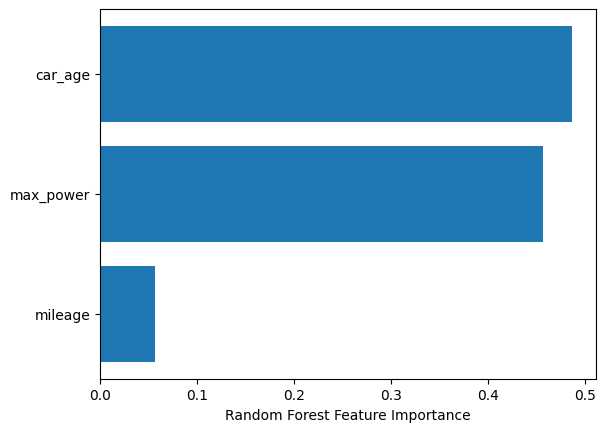

In [54]:
rf = grid.best_estimator_
rf.feature_importances_
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Text(0.5, 0, 'Random Forest Feature Importance')

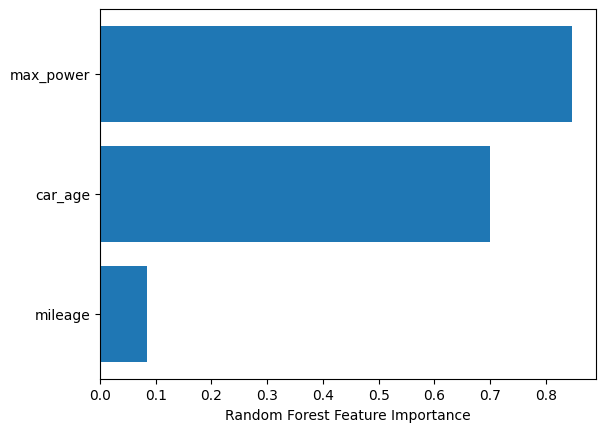

In [55]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rf, X_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


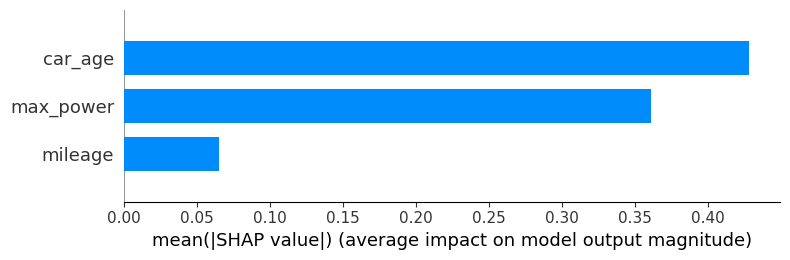

In [56]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

# 9. Inference

In [57]:
# Mitsubishi ASX: max_power: 148, mileage = 13.15, for age = 5
sample = np.array([[148, 13.15, 5]])
yhat = np.exp(grid.predict(sample))
yhat
# (2,514,874) this could be reasonable (the unit couldn't be Dollar), in the data price of a lexus is arount 5 million.

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


array([2514874.64278299])

# 10. Deployment

In [58]:
import pickle
filename = 'model/Car_selling_price.model'
pickle.dump(grid, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'model/Car_selling_price.model'